<a href="https://colab.research.google.com/github/Aditya-Mankar/Black-Friday-Sales-Prediction/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict the purchasing amount of customers during Black Friday, using various features such as age, gender, marital status.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features that can be downloaded <a href="https://www.kaggle.com/sdolezel/black-friday">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are continuous. So the problem we have is a Supervised Regression type.
</p></li>  
</ul>

</div>

## Step 0: Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
train = pd.read_csv('/kaggle/input/black-friday/train.csv')
test = pd.read_csv('/kaggle/input/black-friday/test.csv')

## Step 1: Descriptive analysis

In [3]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [6]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [7]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# Statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [10]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Age
26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: proportion, dtype: object

In [11]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Stay_In_Current_City_Years
1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: proportion, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
</p></li>    

<li><p style="font-family:verdana;">
The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1 Univariate Analysis

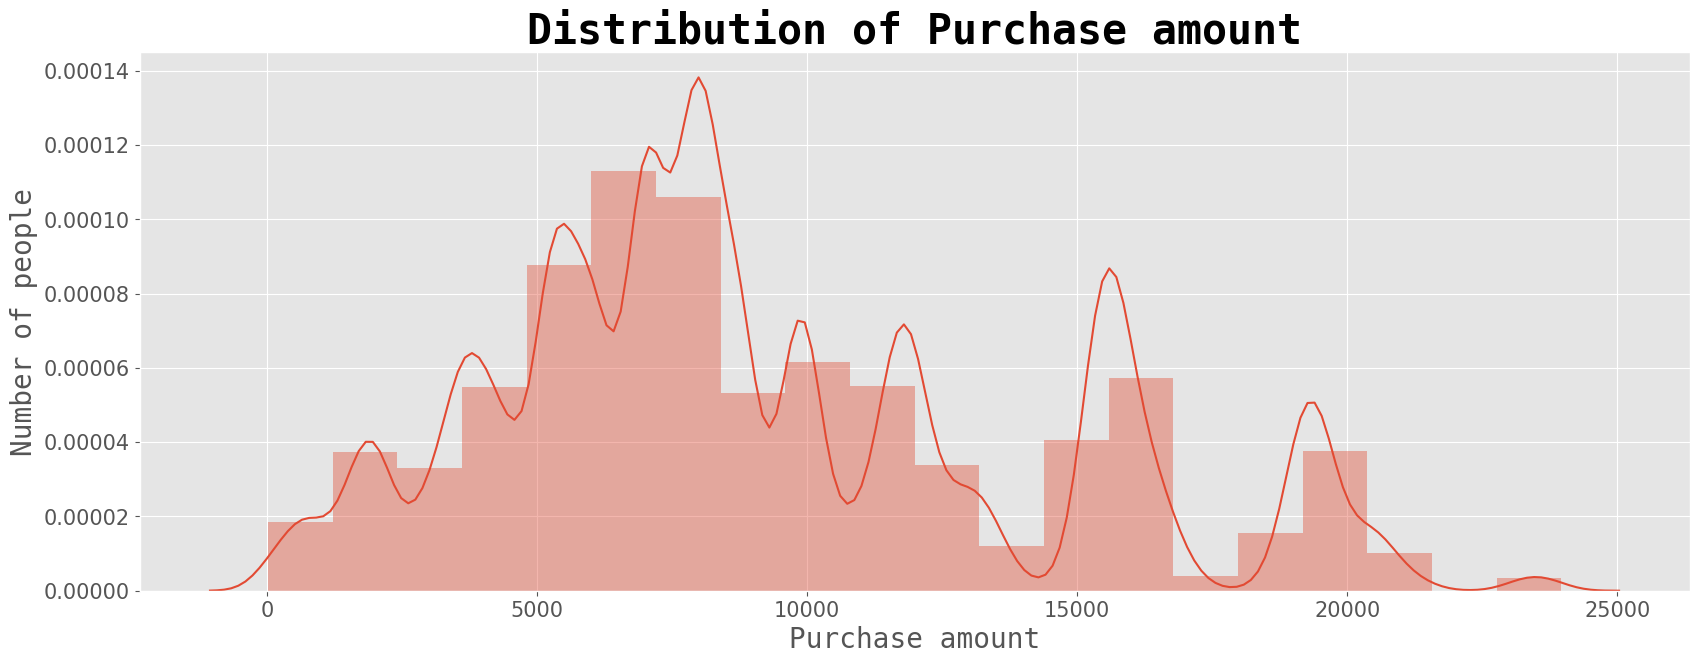

In [12]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

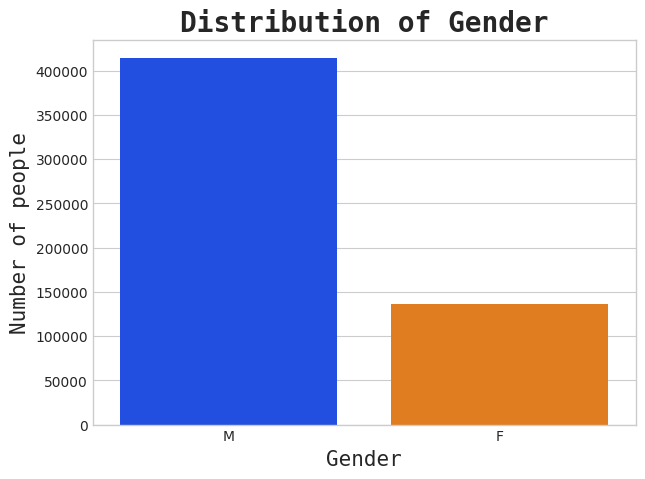

In [13]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize=(7, 5))
plt.style.use('seaborn-whitegrid')

sns.barplot(x=gen.index, y=gen.values, palette='bright')

plt.title('Distribution of Gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


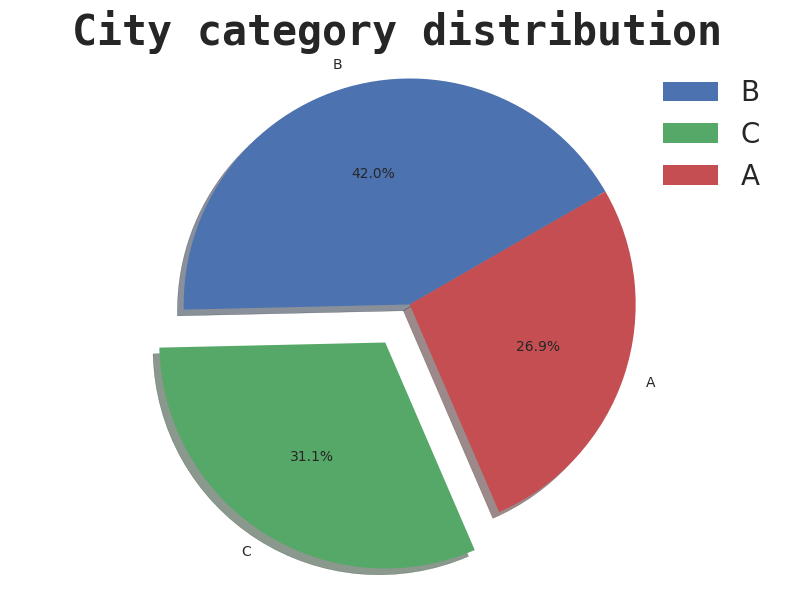

In [14]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

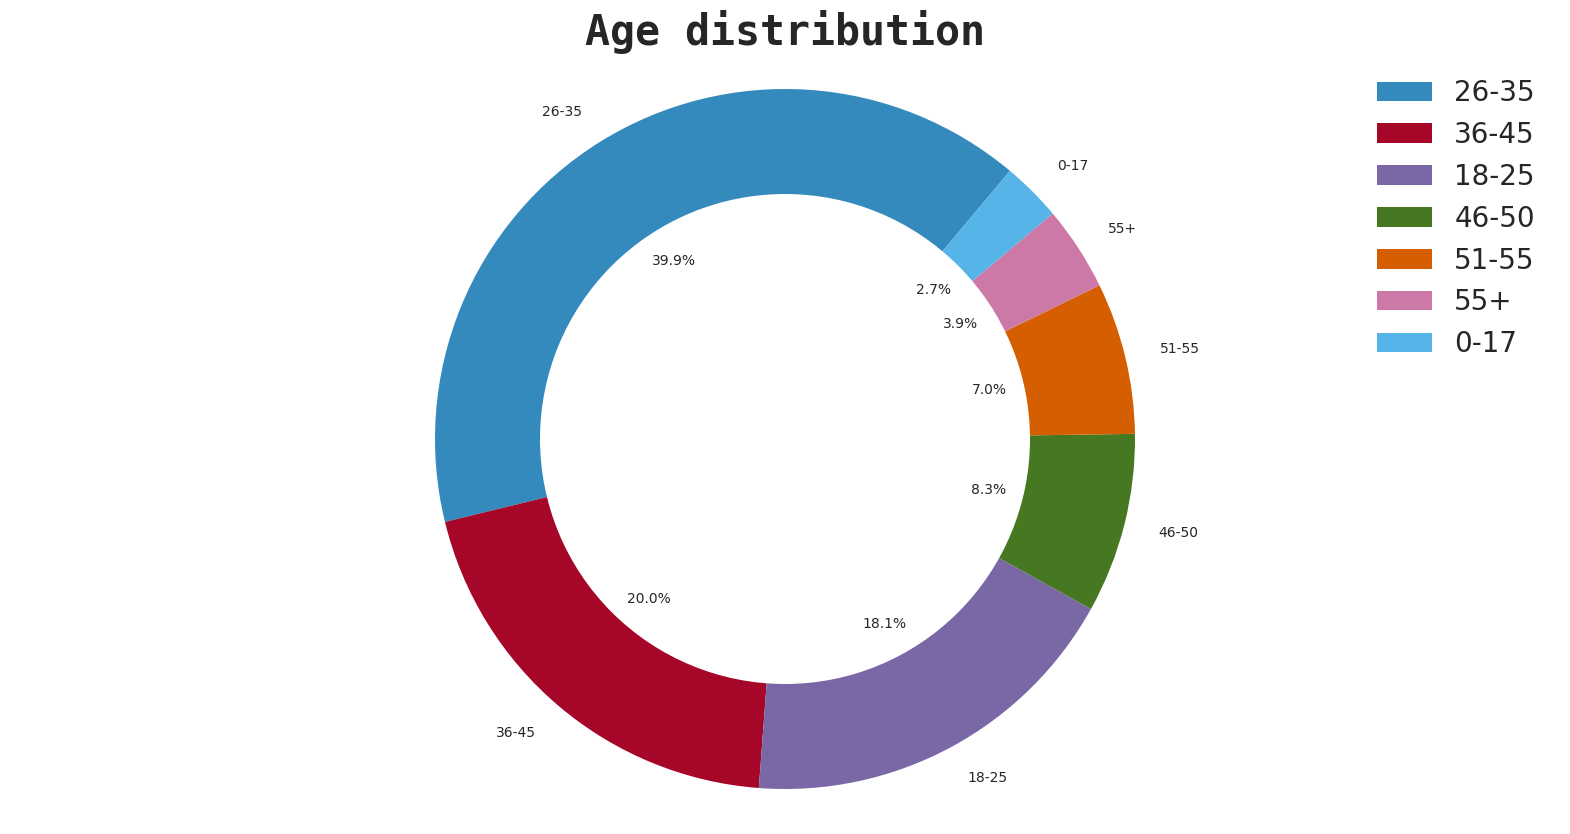

In [15]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

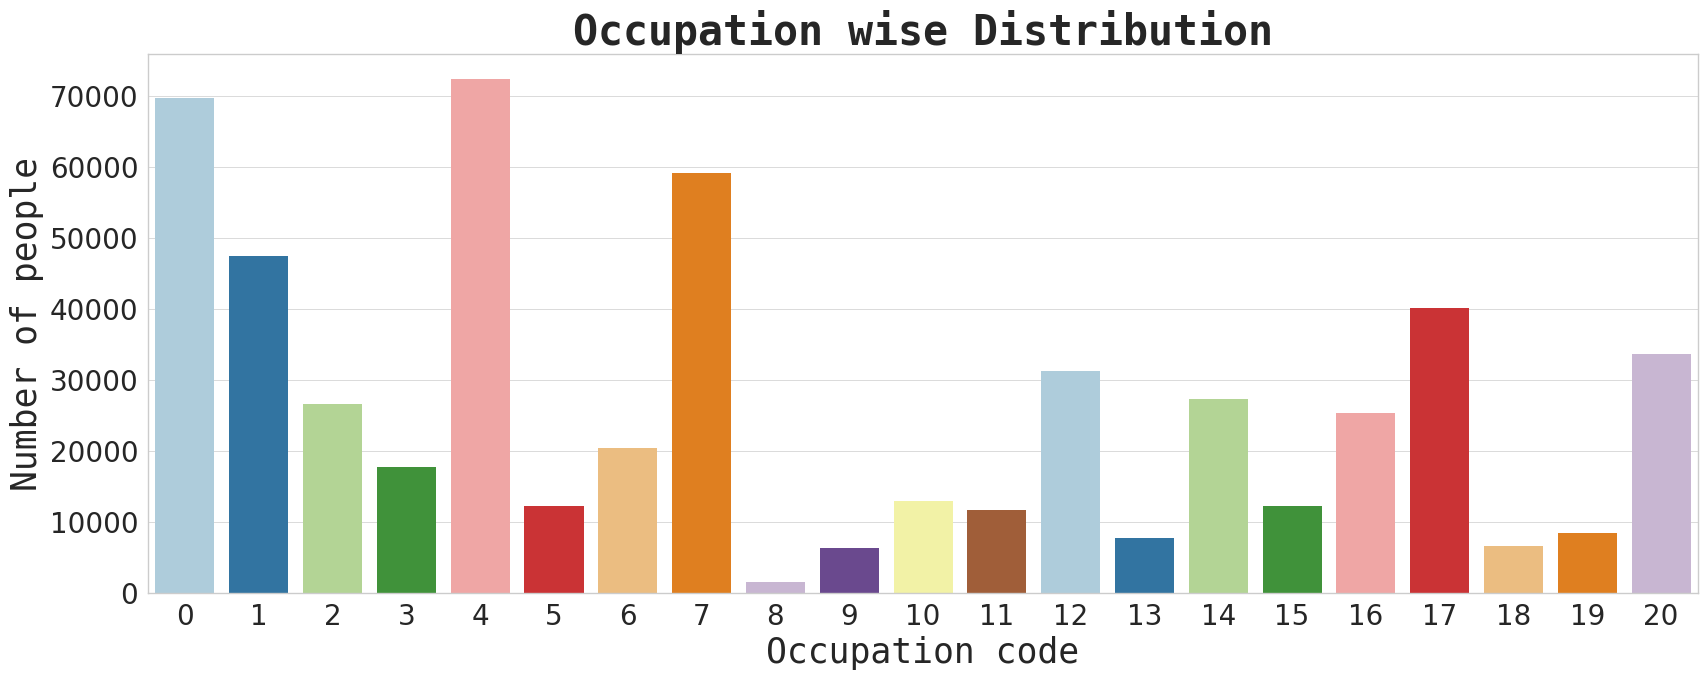

In [16]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize=(20, 7))
plt.style.use('seaborn-whitegrid')

sns.barplot(x=occupation.index, y=occupation.values, palette='Paired')

plt.title('Occupation wise Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Occupation code', fontdict={'fontname': 'Monospace', 'fontsize': 25})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 25})
plt.tick_params(labelsize=20)
plt.show()


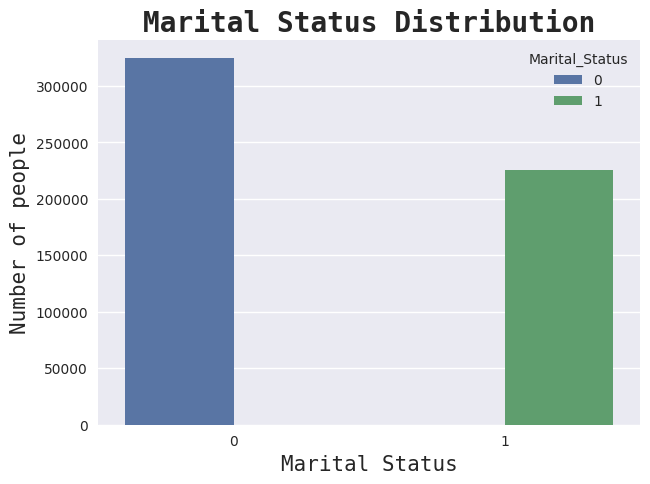

In [17]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize=(7, 5))
sns.countplot(x='Marital_Status', data=train, hue='Marital_Status')
plt.title('Marital Status Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


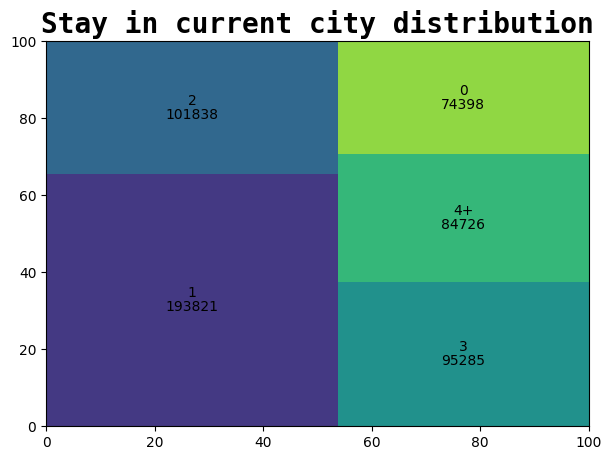

In [18]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = train['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')

# Choose a color palette, for example, 'viridis'
colors = sns.color_palette('viridis', n_colors=len(stay))

plt.figure(figsize=(7, 5))
squarify.plot(sizes=stay.values, label=stay.index, color=colors, value=stay.values)
plt.title('Stay in current city distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()


### 2.2 Bivariate Analysis

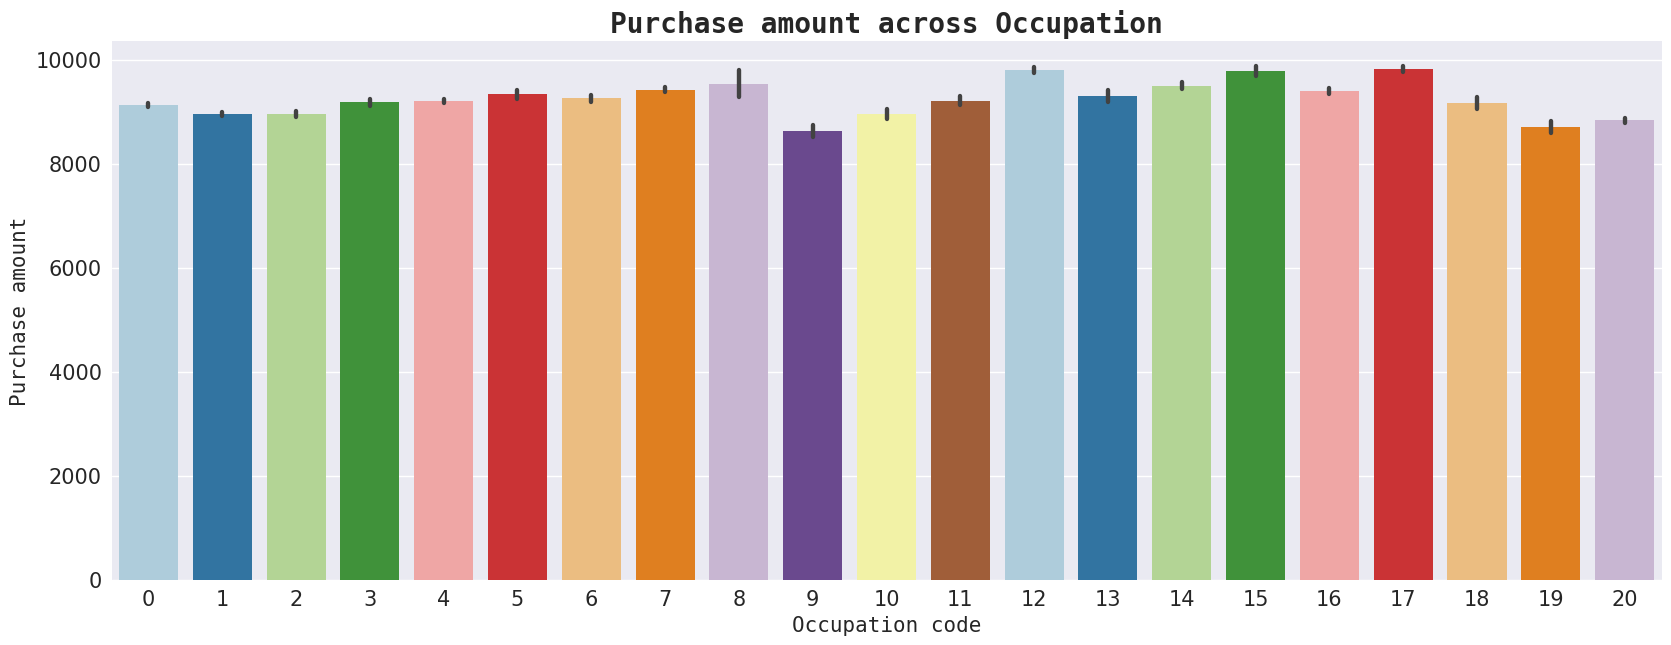

In [19]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize=(20, 7))
plt.style.use('seaborn')
sns.barplot(x='Occupation', y='Purchase', data=train, palette='Paired')
plt.title('Purchase amount across Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Occupation code', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.show()


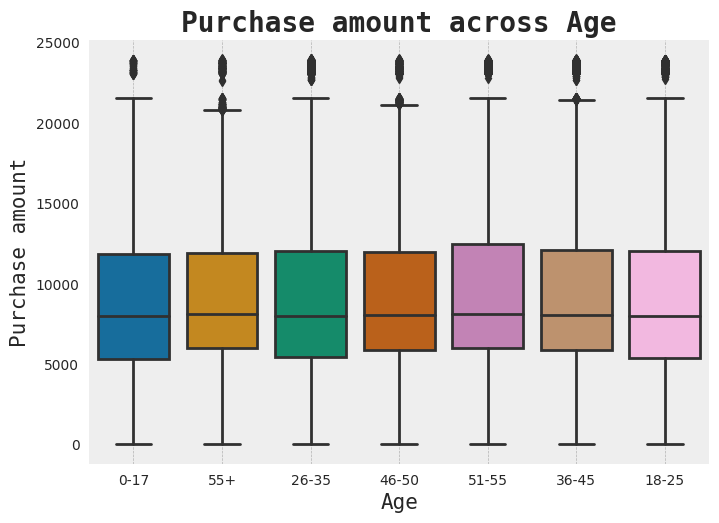

In [20]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(x=train['Age'], y=train['Purchase'], palette='colorblind')
plt.title('Purchase amount across Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()


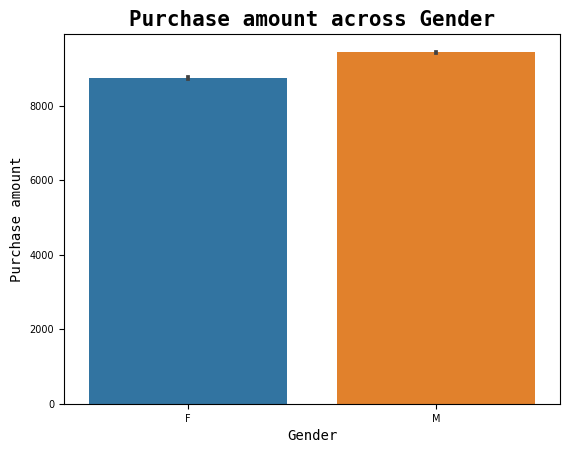

In [21]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(x='Gender', y='Purchase', data=train)
plt.title('Purchase amount across Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)

plt.show()


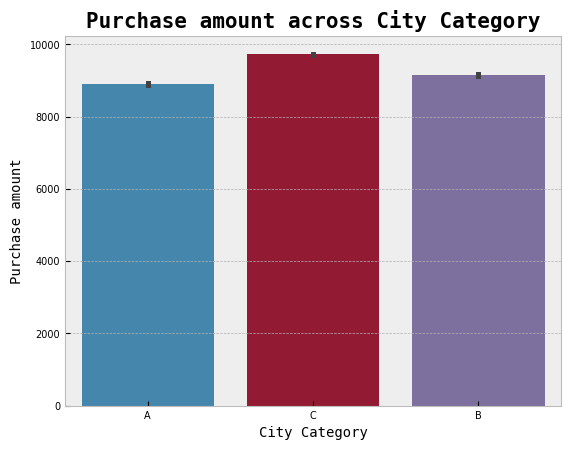

In [22]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(x='City_Category', y='Purchase', data=train)
plt.title('Purchase amount across City Category', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('City Category', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)
plt.show()


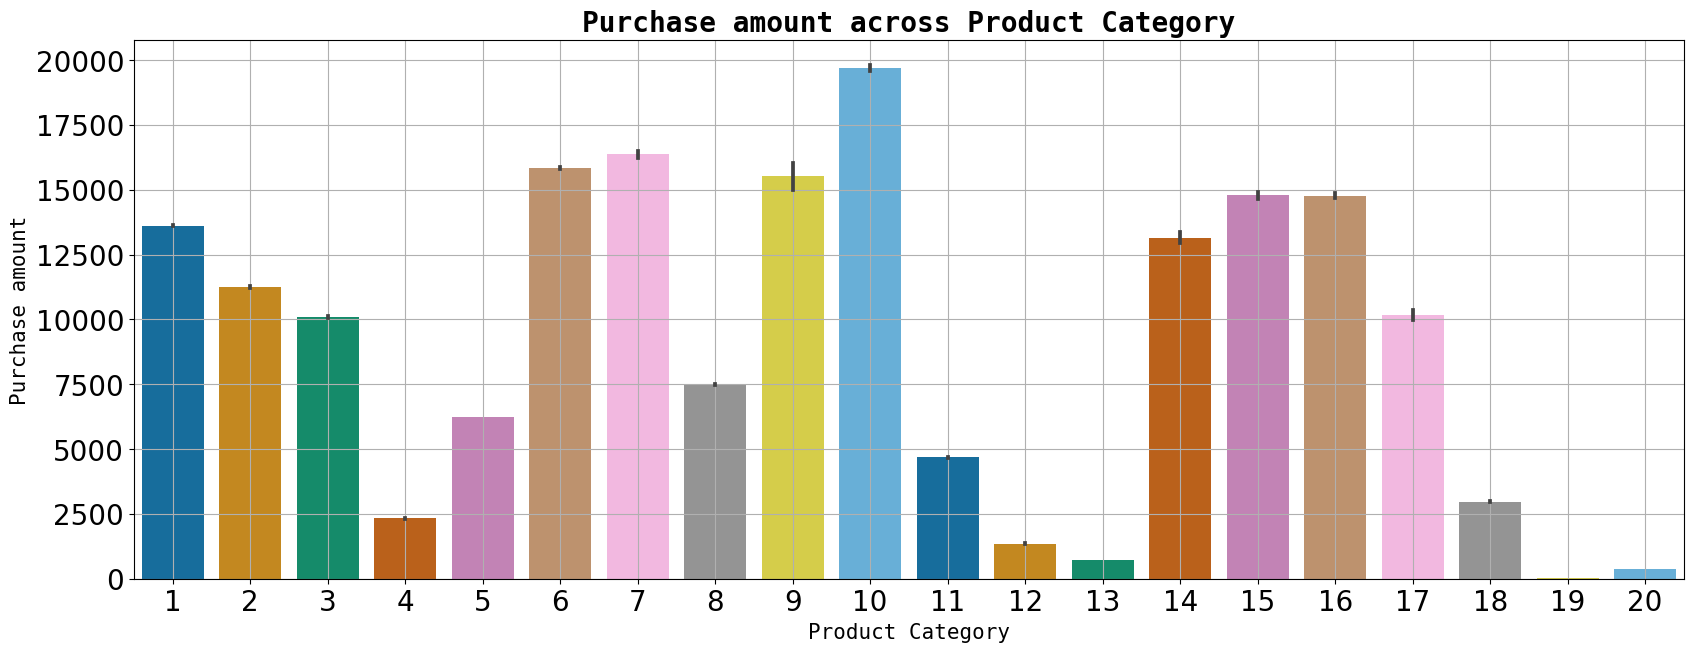

In [23]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.barplot(x='Product_Category_1', y='Purchase', data=train, palette='colorblind')
plt.title('Purchase amount across Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=20)
plt.grid()
plt.show()


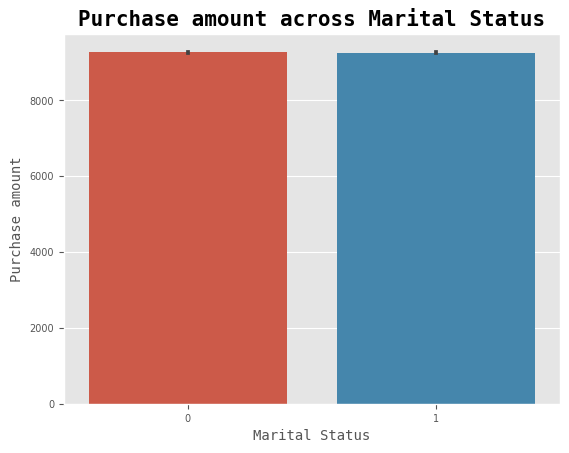

In [24]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.title('Purchase amount across Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)
plt.show()


### 2.3 Multivariate Analysis

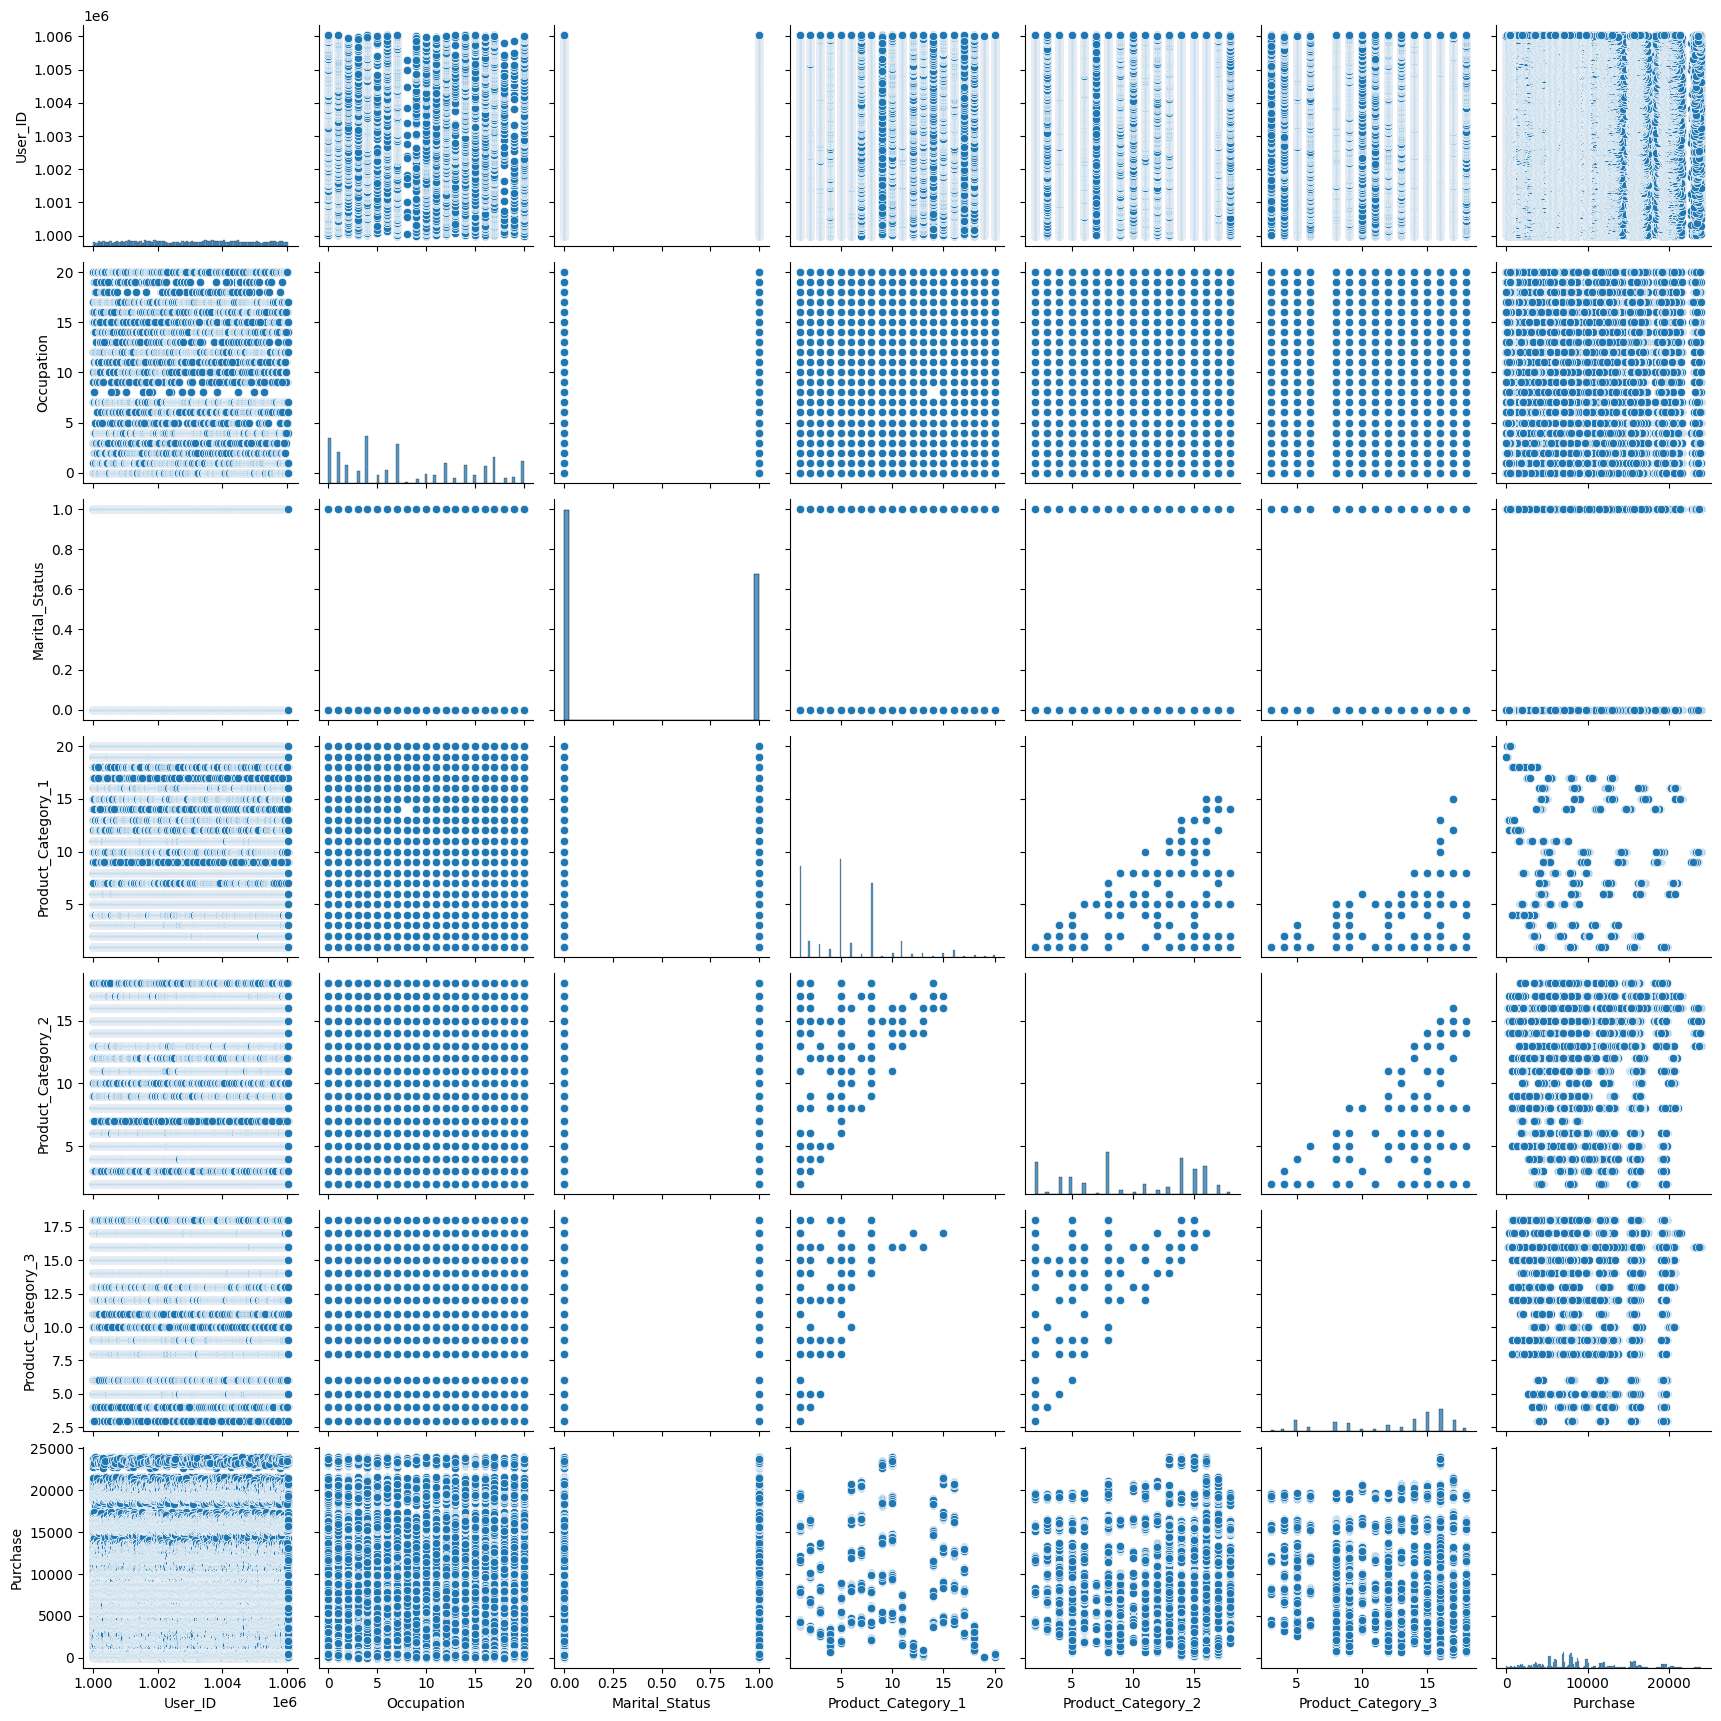

In [25]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

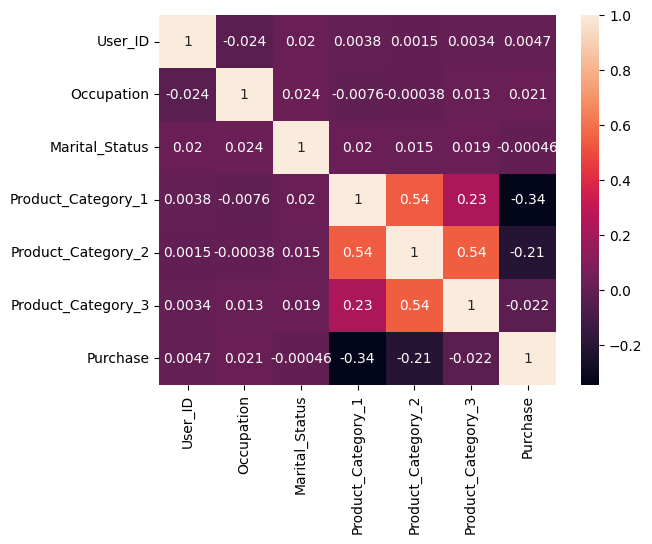

In [26]:
# Selecting only numeric columns for correlation
numeric_columns = train.select_dtypes(include=[np.number])

# Creating a heatmap of correlation matrix
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## Step 3: Data preprocessing

### 3.1: Merging of train and test

In [27]:
train['source'] = 'train'
test['source'] = 'test'

In [28]:
dataset = pd.concat([train, test])

### 3.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [29]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [30]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

### 3.3: Dropping irrelevant features

In [31]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [32]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [33]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 3.4: Feature Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [36]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [37]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

### 3.5: Fixing null values in 'Product_Category_2' 

In [38]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

### 3.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [39]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

### 3.7: Separating dataset into train and test

In [40]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [41]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

### 3.8: Separating train into X and Y

In [42]:
X = train.drop("Purchase", axis = 1)

In [43]:
Y = train["Purchase"]

### 3.9: Feature Selection

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [45]:
selector.fit(X, Y)

ExtraTreesRegressor()

In [46]:
feature_imp = selector.feature_importances_

In [47]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.48
1 2.11
2 4.89
3 0.74
4 2.56
5 0.61
6 80.1
7 8.5


In [48]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### 3.10: Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.11: Creating a train test split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## Step 4: Data Modelling

### 4.1: Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [54]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [55]:
X_train

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
178247,1.849523,-0.165072,0.885331,-1.118912,1.283374
196647,-1.105493,0.601487,1.660861,-0.102705,-0.136401
418590,-0.366739,-0.471696,-0.665728,0.659449,1.046745
408727,-1.105493,-0.625007,0.109801,0.659449,-0.136401
216416,-1.105493,-0.625007,-0.665728,-1.118912,-0.373030
...,...,...,...,...,...
110268,1.110769,1.368046,0.109801,-0.102705,-0.136401
259178,-0.366739,0.908111,0.109801,-0.102705,-0.136401
365838,-1.105493,-1.084943,-0.665728,-0.102705,-0.136401
131932,-1.105493,-0.625007,0.109801,0.659449,1.046745


In [56]:
X_test

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
84432,1.849523,1.674670,0.885331,-1.118912,-1.792805
72724,0.372015,0.448175,-0.665728,-1.118912,1.283374
197032,0.372015,-1.238255,0.109801,0.659449,1.283374
353704,-1.105493,-0.625007,0.885331,-1.118912,1.283374
91198,-1.105493,-0.625007,-1.441258,0.151346,-0.373030
...,...,...,...,...,...
133324,2.588277,0.754799,0.109801,-1.118912,-1.792805
138718,-0.366739,-0.625007,0.885331,0.659449,1.046745
22886,0.372015,1.827982,0.109801,0.659449,-0.136401
137110,0.372015,-0.165072,-1.441258,1.421604,0.810116


In [57]:
Y_pred_lin_reg = lin_reg.predict(X_test)

In [58]:
Y_pred_lin_reg.shape

(110014,)

In [59]:
X_test[col]

84432    -1.792805
72724     1.283374
197032    1.283374
353704    1.283374
91198    -0.373030
            ...   
133324   -1.792805
138718    1.046745
22886    -0.136401
137110    0.810116
515193   -1.319547
Name: Product_Category_2, Length: 110014, dtype: float64

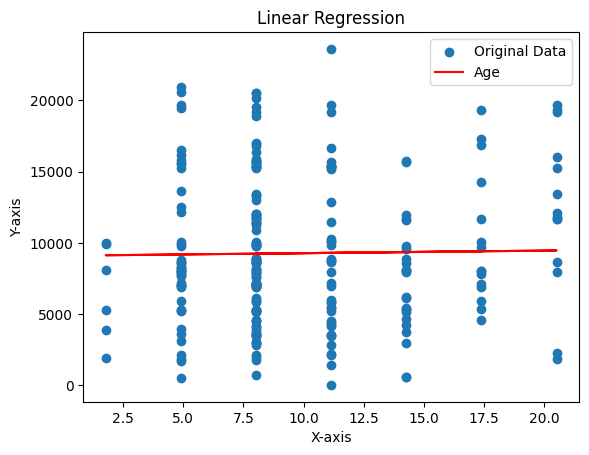

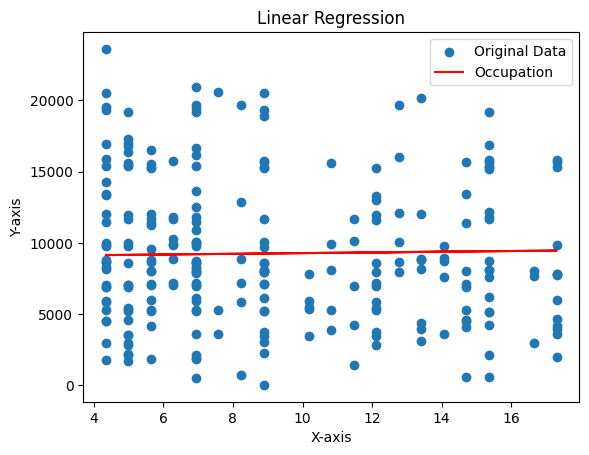

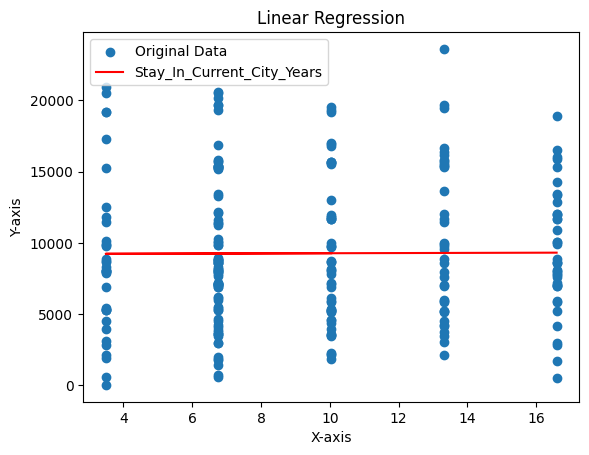

In [60]:
np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lin_reg = LinearRegression()
    lin_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lin_reg = lin_reg.predict(np.array(X_test[col]).reshape(-1, 1))
    
    plt.figure()
    
    # Plot the original data points
    x_test = X_test[col].iloc[idx]
    x_test = scaler.inverse_transform(np.array(x_test).reshape(-1, 1))

    plt.scatter(x_test, Y_test.iloc[idx], label='Original Data')

    # Plot the regression line
    plt.plot(x_test, Y_pred_lin_reg[idx], color='red', label=f'{col}')

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Regression')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

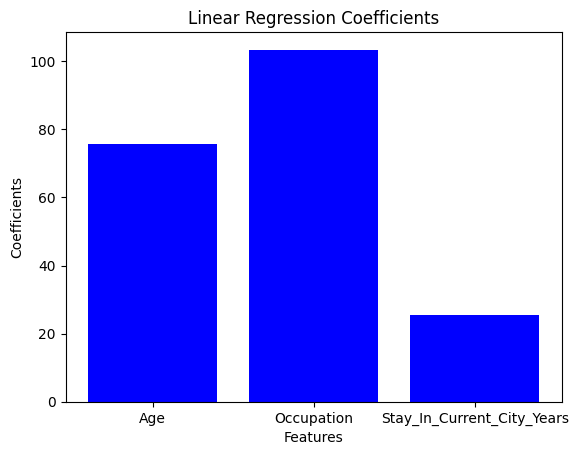

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store coefficients for each feature
coefficients = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lin_reg = LinearRegression()
    lin_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lin_reg = lin_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the coefficient for the current feature
    coefficients[col] = lin_reg.coef_[0]

# Plot the coefficients using a bar plot
plt.bar(coefficients.keys(), coefficients.values(), color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.show()


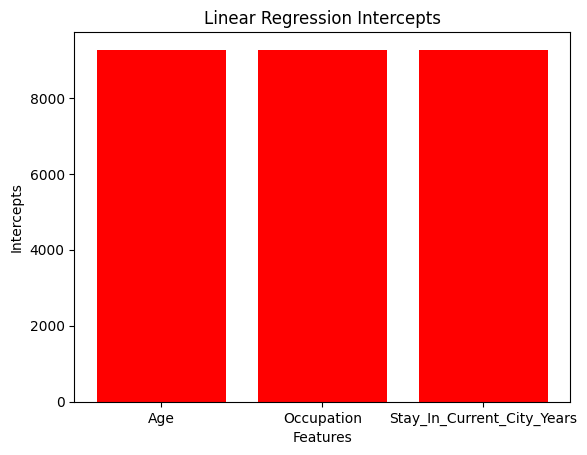

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store intercepts
intercepts = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lin_reg = LinearRegression()
    lin_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lin_reg = lin_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the intercept for the current feature
    intercepts[col] = lin_reg.intercept_

# Plot the intercepts using a bar plot
plt.bar(intercepts.keys(), intercepts.values(), color='red')
plt.xlabel('Features')
plt.ylabel('Intercepts')
plt.title('Linear Regression Intercepts')
plt.show()


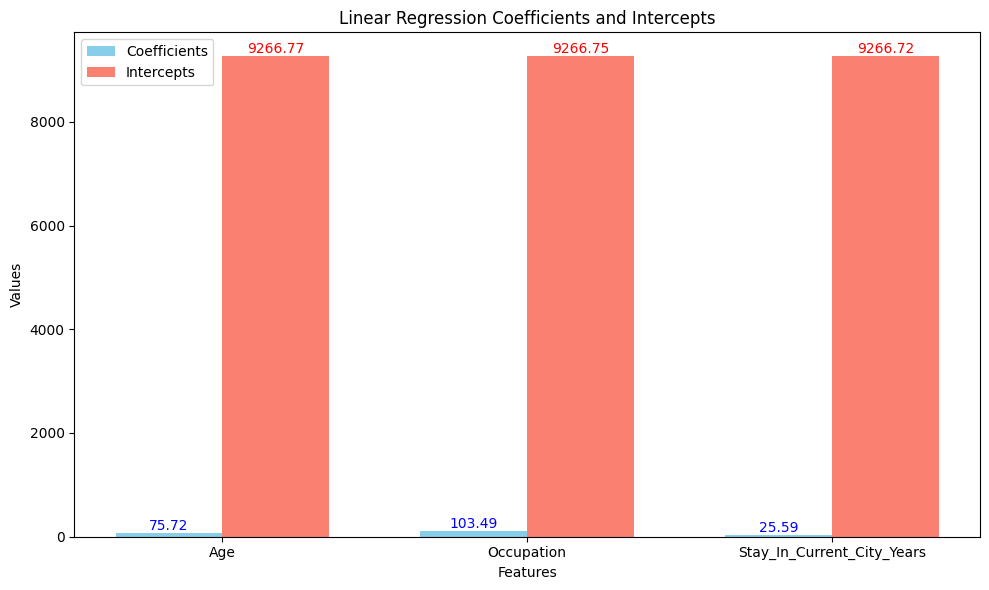

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store coefficients and intercept
coefficients = {}
intercepts = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lin_reg = LinearRegression()
    lin_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lin_reg = lin_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the coefficient and intercept for the current feature
    coefficients[col] = lin_reg.coef_[0]
    intercepts[col] = lin_reg.intercept_

# Plot the coefficients and intercepts using a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Bar plot for coefficients
ax.bar(np.arange(len(coefficients)) - bar_width/2, coefficients.values(), bar_width, color='skyblue', label='Coefficients')

# Bar plot for intercepts
ax.bar(np.arange(len(intercepts)) + bar_width/2, intercepts.values(), bar_width, color='salmon', label='Intercepts')

ax.set_xticks(np.arange(len(coefficients)))
ax.set_xticklabels(coefficients.keys())
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Linear Regression Coefficients and Intercepts')
plt.legend()

# Add annotations for values
for i, v in enumerate(coefficients.values()):
    ax.text(i - bar_width/2, v + 0.1, f'{v:.2f}', color='blue', ha='center', va='bottom')

for i, v in enumerate(intercepts.values()):
    ax.text(i + bar_width/2, v + 0.1, f'{v:.2f}', color='red', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 4.2: Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Create a Lasso regressor
alpha = 0.01  # Regularization strength (adjust as needed)
lasso_reg = Lasso(alpha=alpha)

In [65]:
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [66]:
Y_pred_lasso_reg = lasso_reg.predict(X_test)

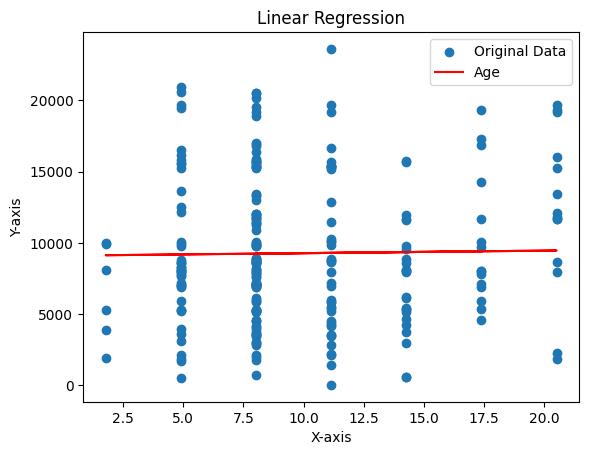

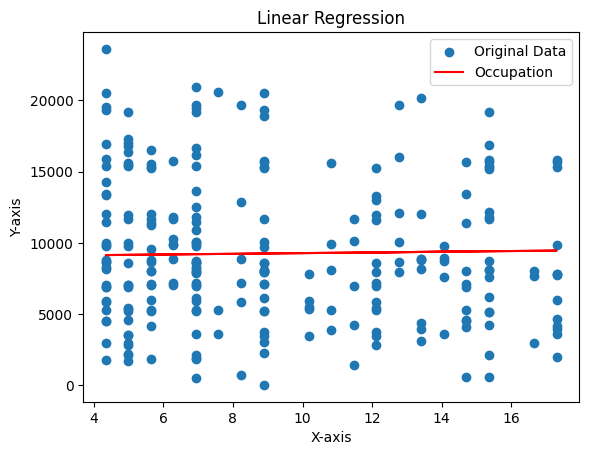

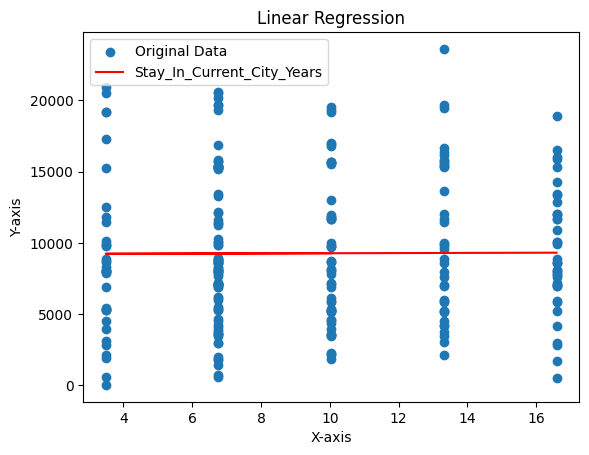

In [67]:
np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lasso_reg = Lasso()
    lasso_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lasso_reg = lasso_reg.predict(np.array(X_test[col]).reshape(-1, 1))
    
    plt.figure()
    
    # Plot the original data points
    x_test = X_test[col].iloc[idx]
    x_test = scaler.inverse_transform(np.array(x_test).reshape(-1, 1))

    plt.scatter(x_test, Y_test.iloc[idx], label='Original Data')

    # Plot the regression line
    plt.plot(x_test, Y_pred_lasso_reg[idx], color='red', label=f'{col}')

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Regression')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

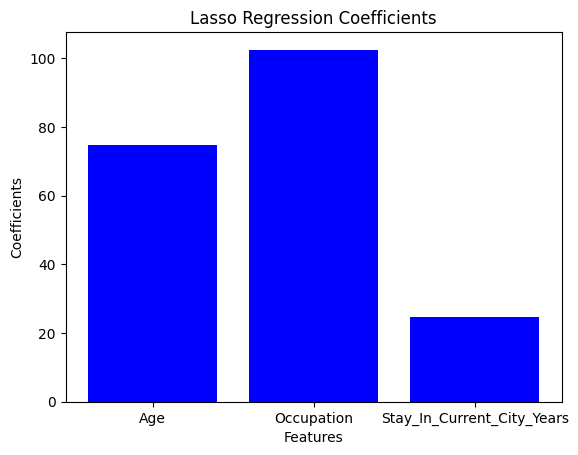

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store coefficients for each feature
coefficients = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lasso_reg = Lasso()
    lasso_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lasso_reg = lasso_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the coefficient for the current feature
    coefficients[col] = lasso_reg.coef_[0]

# Plot the coefficients using a bar plot
plt.bar(coefficients.keys(), coefficients.values(), color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()


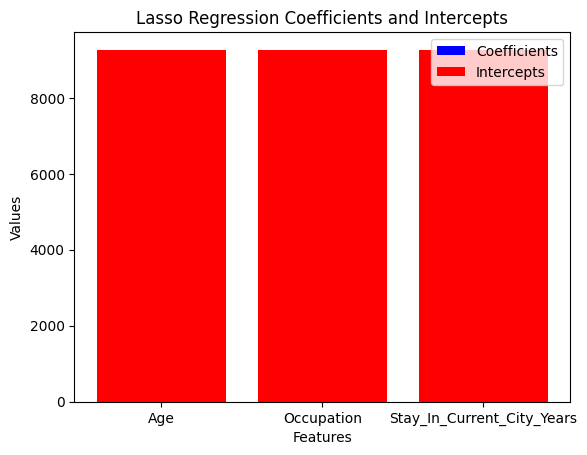

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store coefficients and intercept
coefficients = {}
intercepts = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lasso_reg = Lasso()
    lasso_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lasso_reg = lasso_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the coefficient and intercept for the current feature
    coefficients[col] = lasso_reg.coef_[0]
    intercepts[col] = lasso_reg.intercept_

# Plot the coefficients and intercepts using a bar plot
fig, ax = plt.subplots()
ax.bar(coefficients.keys(), coefficients.values(), color='blue', label='Coefficients')
ax.bar(intercepts.keys(), intercepts.values(), color='red', label='Intercepts')

plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Lasso Regression Coefficients and Intercepts')
plt.legend()
plt.show()


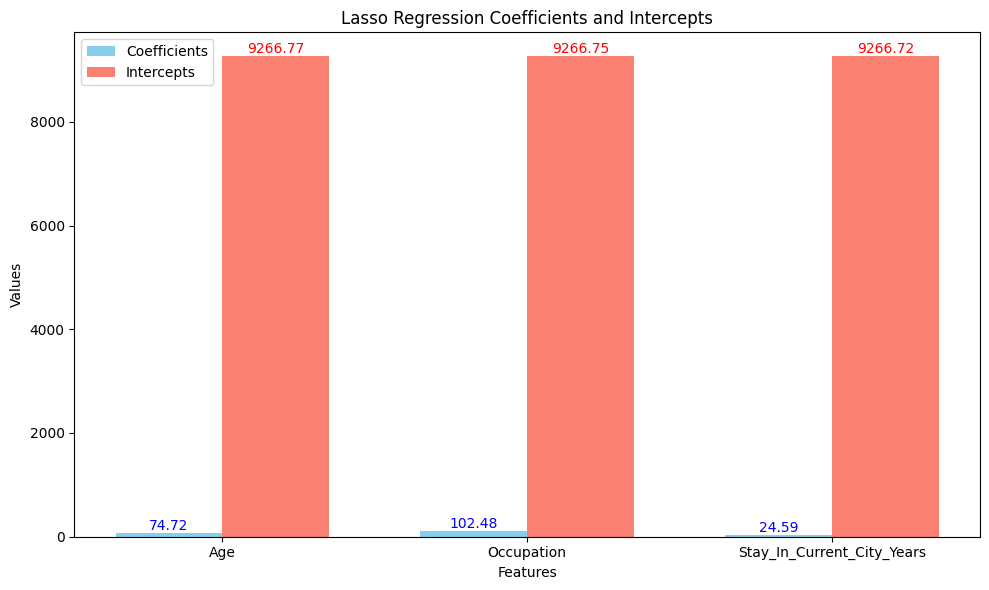

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, Y_train, Y_test, and scaler are already defined

np.random.seed(42)
idx = list(np.random.choice(X_test.shape[0], size=256))

# Create a dictionary to store coefficients and intercept
coefficients = {}
intercepts = {}

for col in ['Age', 'Occupation', 'Stay_In_Current_City_Years']:
    lasso_reg = Lasso()
    lasso_reg.fit(np.array(X_train[col]).reshape(-1, 1), Y_train)
    Y_pred_lasso_reg = lasso_reg.predict(np.array(X_test[col]).reshape(-1, 1))

    # Get the coefficient and intercept for the current feature
    coefficients[col] = lasso_reg.coef_[0]
    intercepts[col] = lasso_reg.intercept_

# Plot the coefficients and intercepts using a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Bar plot for coefficients
ax.bar(np.arange(len(coefficients)) - bar_width/2, coefficients.values(), bar_width, color='skyblue', label='Coefficients')

# Bar plot for intercepts
ax.bar(np.arange(len(intercepts)) + bar_width/2, intercepts.values(), bar_width, color='salmon', label='Intercepts')

ax.set_xticks(np.arange(len(coefficients)))
ax.set_xticklabels(coefficients.keys())
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Lasso Regression Coefficients and Intercepts')
plt.legend()

# Add annotations for values
for i, v in enumerate(coefficients.values()):
    ax.text(i - bar_width/2, v + 0.01, f'{v:.2f}', color='blue', ha='center', va='bottom')

for i, v in enumerate(intercepts.values()):
    ax.text(i + bar_width/2, v + 0.01, f'{v:.2f}', color='red', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 4.3: Decision Tree Regression

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import pandas as pd
import random
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# Initialize the Decision Tree Regressor
dec_tree = DecisionTreeRegressor()

# Fit the model on the training data
dec_tree.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dec = dec_tree.predict(X_test)

# Evaluate the performance on the test set
print("Decision tree regression: ")
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
# print("R2 score:", r2_score(Y_test, Y_pred_dec))

# 5-fold cross-validation
Y_pred_cv_dec = cross_val_predict(dec_tree, X, Y, cv=5)

# Evaluate cross-validated performance
print("Cross-validated RMSE:", np.sqrt(mean_squared_error(Y, Y_pred_cv_dec)))
# print("Cross-validated R2 score:", r2_score(Y, Y_pred_cv_dec))

# Choose 70% of cross-validated predictions randomly
percent_to_save = 0.7
num_samples_to_save = int(len(Y_pred_cv_dec) * percent_to_save)

# Randomly select indices
random_indices = random.sample(range(len(Y_pred_cv_dec)), num_samples_to_save)

# Extract the selected predictions
selected_predictions_dec = Y_pred_cv_dec[random_indices]

# Create a DataFrame with the selected predictions
result_df_dec = pd.DataFrame({"Predictions": selected_predictions_dec})

# Save the DataFrame to a CSV file
result_df_dec.to_csv("selected_predictions_decision_tree.csv", index=False)

# Provide a download link for the CSV file
download_link_dec = "selected_predictions_decision_tree.csv"
print(f"CSV file saved. You can download it here: {download_link_dec}")


X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)
Decision tree regression: 
RMSE: 3065.407535409867
Cross-validated RMSE: 3057.0935372732874
CSV file saved. You can download it here: selected_predictions_decision_tree.csv


## Plotting Histogram

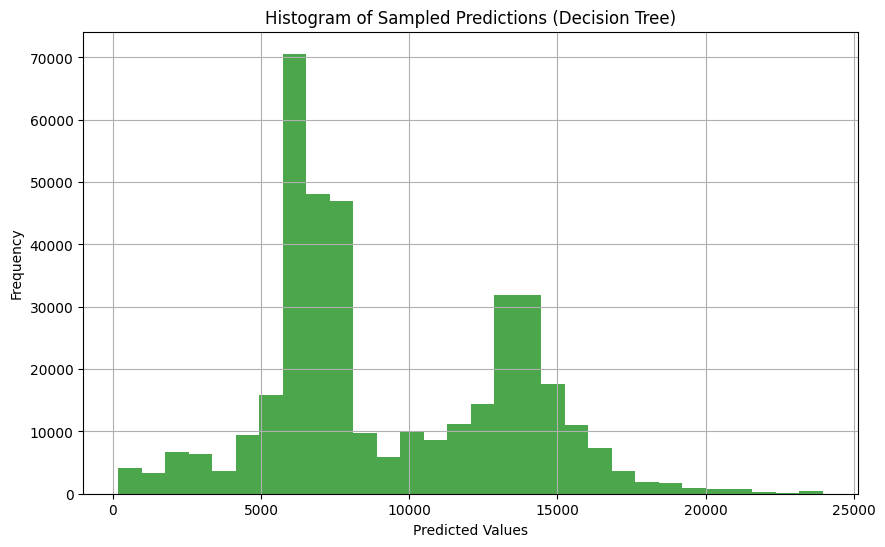

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sampled data from the CSV file
file_path_dec_tree = '/kaggle/working/selected_predictions_decision_tree.csv'
sampled_data_dec_tree = pd.read_csv(file_path_dec_tree)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_dec_tree['Predictions'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Sampled Predictions (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


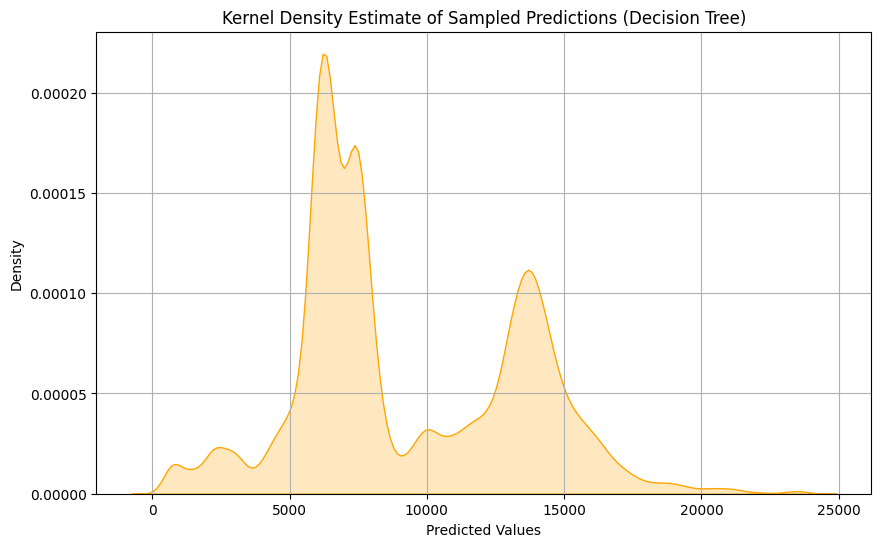

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sampled data from the CSV file
file_path_dec_tree = '/kaggle/working/selected_predictions_decision_tree.csv'
sampled_data_dec_tree = pd.read_csv(file_path_dec_tree)

# Plot the KDE (Kernel Density Estimate) to estimate the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(sampled_data_dec_tree['Predictions'], fill=True, color='orange')
plt.title('Kernel Density Estimate of Sampled Predictions (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [74]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [75]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [76]:
Y_pred_dec = dec_tree.predict(X_test)

### 4.4: Random Forest Regressor

In [77]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import random

# Assuming you have X and Y defined before this point
# ...

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# Initialize the Random Forest Regressor
ran_for = RandomForestRegressor()

# Fit the model on the training data
ran_for.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_ran_for = ran_for.predict(X_test)

# Evaluate the performance on the test set
print("Random forest regression: ")
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
# print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

# 5-fold cross-validation
Y_pred_cv = cross_val_predict(ran_for, X, Y, cv=5)

# Evaluate cross-validated performance
print("Cross-validated RMSE:", np.sqrt(mean_squared_error(Y, Y_pred_cv)))
# print("Cross-validated R2 score:", r2_score(Y, Y_pred_cv))

# Choose 70% of predictions randomly
percent_to_save = 0.7
num_samples_to_save = int(len(Y_pred_ran_for) * percent_to_save)

# Randomly select indices
random_indices = random.sample(range(len(Y_pred_ran_for)), num_samples_to_save)

# Extract the selected predictions and corresponding input features (if needed)
selected_predictions = Y_pred_ran_for[random_indices]
# If you have corresponding input features X, you can also extract them
# selected_features = X[random_indices]

# Create a DataFrame with the selected predictions
result_df = pd.DataFrame({"Predictions": selected_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv("selected_predictions.csv", index=False)

# Provide a download link for the CSV file
download_link = "selected_predictions.csv"
print(f"CSV file saved. You can download it here: {download_link}")


X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)
Random forest regression: 
RMSE: 3032.5565780554384
Cross-validated RMSE: 3023.9119221843794
CSV file saved. You can download it here: selected_predictions.csv


In [78]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [79]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.5: XGB Regressor

In [81]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [82]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
Y_pred_xgb = xgb.predict(X_test)

## Step 5: Model Evaluation

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming Y_test and Y_pred_lin_reg are already defined

print("Linear Regression: ")
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))

#print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 5012.513743951517


In [86]:
print("Lasso regressor: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lasso_reg)))
#print("R2 score:", r2_score(Y_test, Y_pred_knn))

Lasso regressor: 
RMSE: 5012.515489141803


In [87]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
#print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3065.5185886867844


In [88]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
#print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3032.182665521065


In [89]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
#print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression: 
RMSE: 2981.941132730532


## Step 6: Hyperparameter tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [92]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [93]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [94]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [95]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [96]:
xgb_cv.best_score_

0.651101485336677

In [97]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [98]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [99]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [101]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2986.2151959262324
R2 score: 0.645092042804424


## Plotting Histogram of sampled data

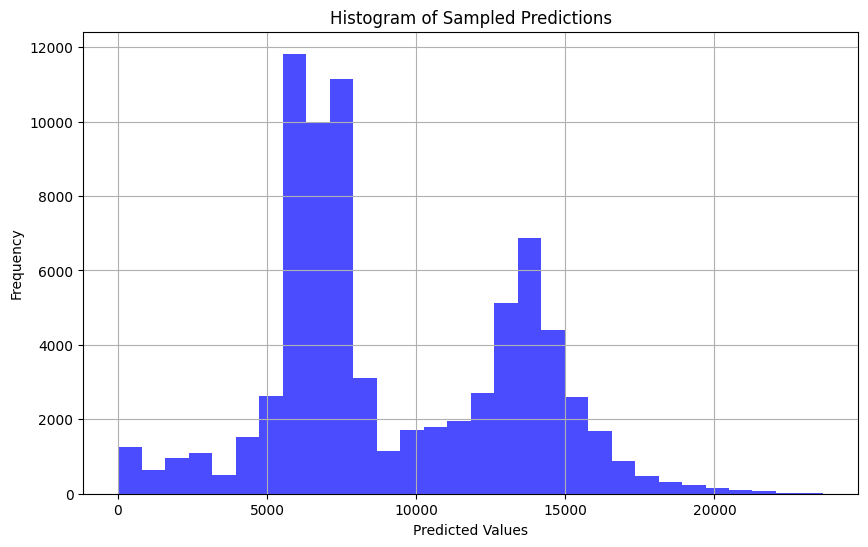

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sampled data from the CSV file
file_path = '/kaggle/working/selected_predictions.csv'
sampled_data = pd.read_csv(file_path)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sampled_data['Predictions'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Sampled Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


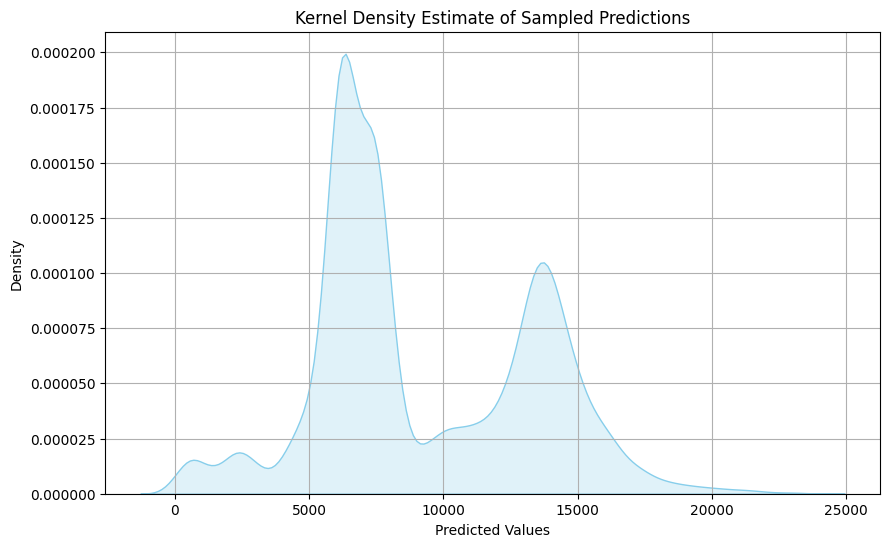

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sampled data from the CSV file
file_path = '/kaggle/working/selected_predictions.csv'
sampled_data = pd.read_csv(file_path)

# Plot the KDE (Kernel Density Estimate) to estimate the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(sampled_data['Predictions'], fill=True, color='skyblue')
plt.title('Kernel Density Estimate of Sampled Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()


## Applying Mann-Whitney test on sampled data from Decision Tree and Random forest

In [104]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Load the sampled data from the CSV files
file_path_random = '/kaggle/working/selected_predictions.csv'
file_path_decision_tree = '/kaggle/working/selected_predictions_decision_tree.csv'

sampled_data_random = pd.read_csv(file_path_random)
sampled_data_decision_tree = pd.read_csv(file_path_decision_tree)

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(sampled_data_random['Predictions'], sampled_data_decision_tree['Predictions'])

# Display the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the distributions.")


Mann-Whitney U statistic: 14806010686.5
P-value: 0.5532957835425718
Fail to reject the null hypothesis. There is no significant difference between the distributions.


## Applying Wilcoxon Sign Rank Test on sampled data from Decision tree and Random forest

In [105]:
from scipy.stats import wilcoxon
import pandas as pd
import random

# Load the sampled data from the CSV files
file_path_random = '/kaggle/working/selected_predictions.csv'
file_path_decision_tree = '/kaggle/working/selected_predictions_decision_tree.csv'

sampled_data_random = pd.read_csv(file_path_random)
sampled_data_decision_tree = pd.read_csv(file_path_decision_tree)

# Determine the minimum length between the two datasets
min_length = min(len(sampled_data_random), len(sampled_data_decision_tree))

# Randomly sample a subset from the larger dataset
sampled_data_decision_tree_subset = sampled_data_decision_tree.sample(n=min_length, random_state=42)

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sampled_data_random['Predictions'], sampled_data_decision_tree_subset['Predictions'])

# Display the results
print(f"Wilcoxon signed-rank statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the paired samples.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the paired samples.")


Wilcoxon signed-rank statistic: 1477284081.0
P-value: 0.3874507981091424
Fail to reject the null hypothesis. There is no significant difference between the paired samples.


In [106]:
print("Length of sampled_data_random:", len(sampled_data_random['Predictions']))
print("Length of sampled_data_decision_tree:", len(sampled_data_decision_tree['Predictions']))

Length of sampled_data_random: 77009
Length of sampled_data_decision_tree: 385047


## Plot of sampled data

### Histogram

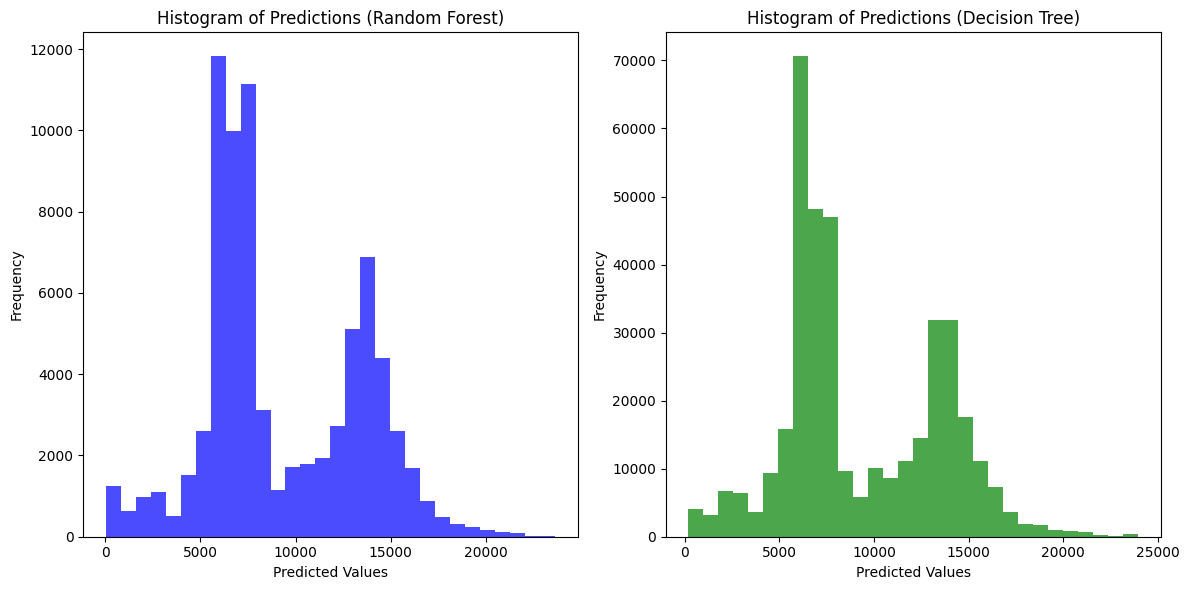

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path_random = '/kaggle/working/selected_predictions.csv'
file_path_decision_tree = '/kaggle/working/selected_predictions_decision_tree.csv'

sampled_data_random = pd.read_csv(file_path_random)
sampled_data_decision_tree = pd.read_csv(file_path_decision_tree)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sampled_data_random['Predictions'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predictions (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_data_decision_tree['Predictions'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Predictions (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Box plot

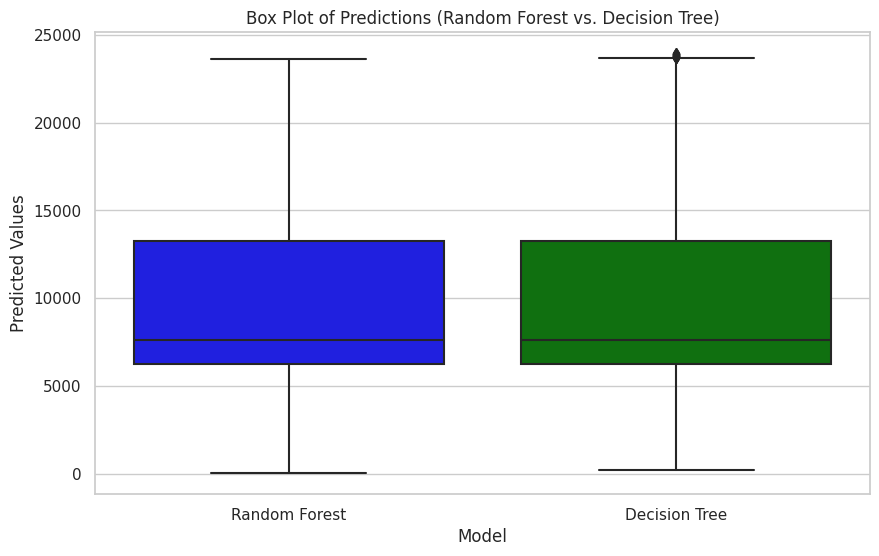

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data
file_path_random = '/kaggle/working/selected_predictions.csv'
file_path_decision_tree = '/kaggle/working/selected_predictions_decision_tree.csv'

sampled_data_random = pd.read_csv(file_path_random)
sampled_data_decision_tree = pd.read_csv(file_path_decision_tree)

# Ensure both datasets have the same number of data points
min_length = min(len(sampled_data_random), len(sampled_data_decision_tree))
sampled_data_random = sampled_data_random.sample(n=min_length, random_state=42)
sampled_data_decision_tree = sampled_data_decision_tree.sample(n=min_length, random_state=42)

# Set a common color palette for better consistency
color_palette = {'Random Forest': 'blue', 'Decision Tree': 'green'}

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Predictions', data=pd.concat([sampled_data_random.assign(Model='Random Forest'), sampled_data_decision_tree.assign(Model='Decision Tree')]), palette=color_palette)
plt.title('Box Plot of Predictions (Random Forest vs. Decision Tree)')
plt.ylabel('Predicted Values')
plt.xlabel('Model')
plt.show()


### CDF

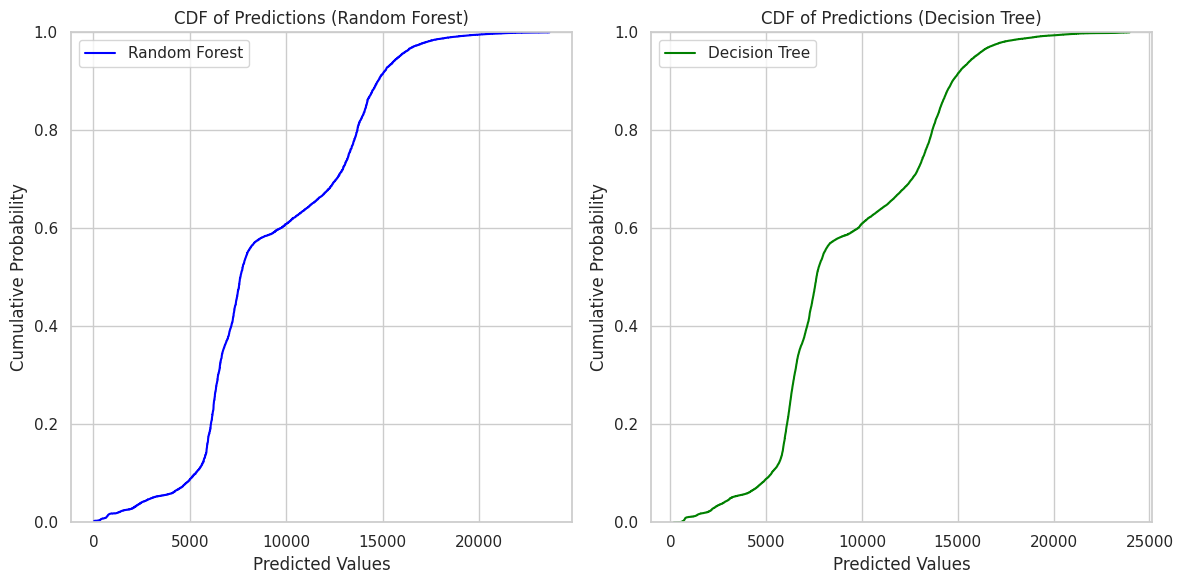

In [119]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.ecdfplot(sampled_data_random['Predictions'], label='Random Forest', color='blue')
plt.title('CDF of Predictions (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.subplot(1, 2, 2)
sns.ecdfplot(sampled_data_decision_tree['Predictions'], label='Decision Tree', color='green')
plt.title('CDF of Predictions (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()


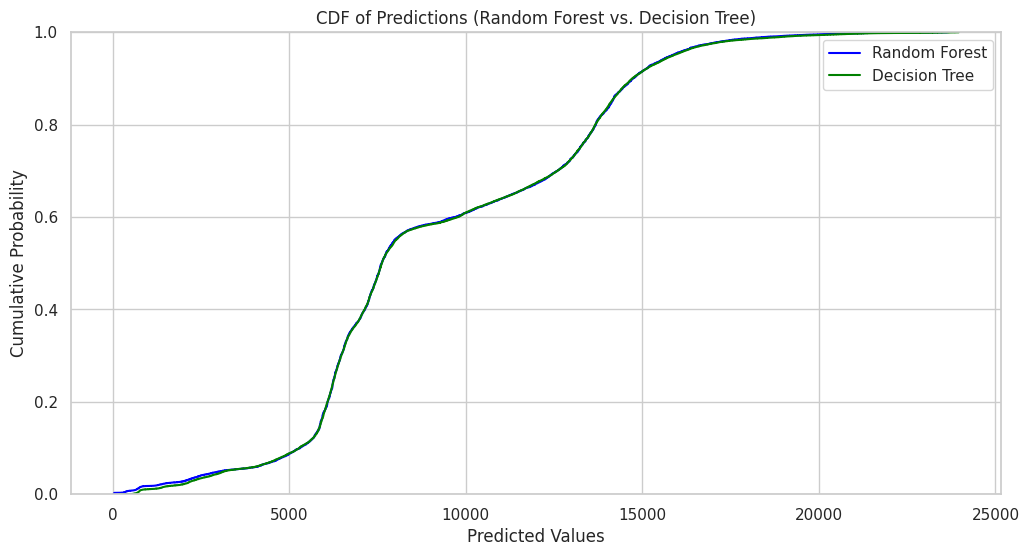

In [120]:
# Cumulative Distribution Function (CDF)
plt.figure(figsize=(12, 6))
sns.ecdfplot(sampled_data_random['Predictions'], label='Random Forest', color='blue')
sns.ecdfplot(sampled_data_decision_tree['Predictions'], label='Decision Tree', color='green')
plt.title('CDF of Predictions (Random Forest vs. Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()


### Violin plot

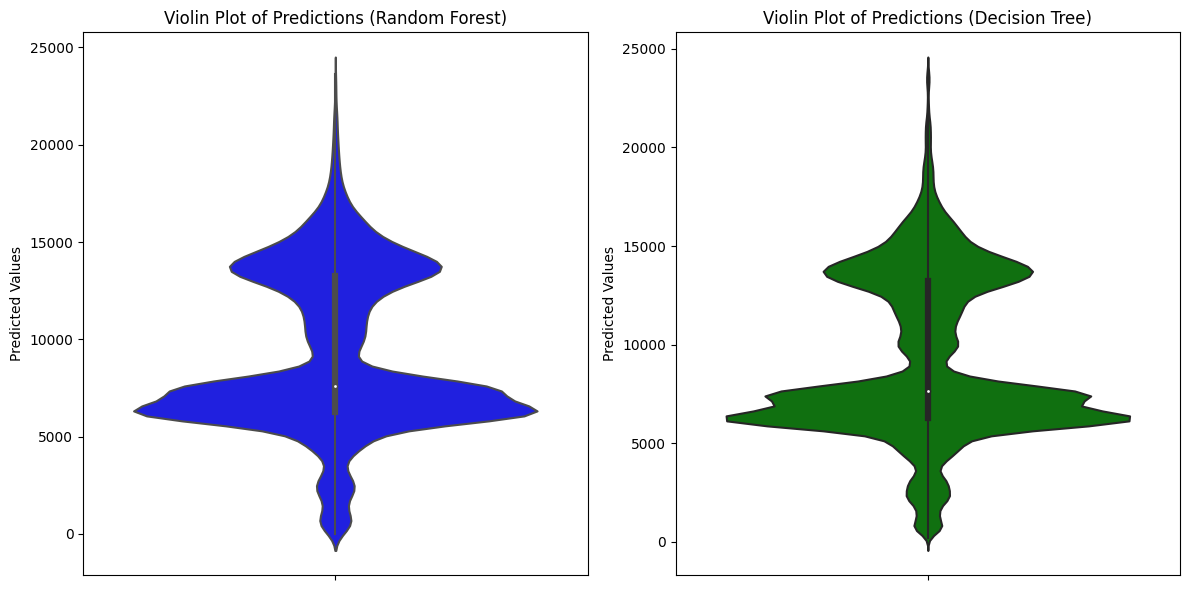

In [111]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=sampled_data_random['Predictions'], color='blue')
plt.title('Violin Plot of Predictions (Random Forest)')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
sns.violinplot(y=sampled_data_decision_tree['Predictions'], color='green')
plt.title('Violin Plot of Predictions (Decision Tree)')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


### Pair plot

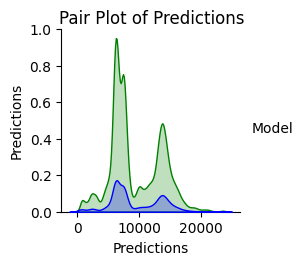

In [112]:
import seaborn as sns

# Combine the datasets for a joint pair plot
sampled_data_random['Model'] = 'Random Forest'
sampled_data_decision_tree['Model'] = 'Decision Tree'
combined_data = pd.concat([sampled_data_random, sampled_data_decision_tree])

# Pair plot
sns.pairplot(combined_data, hue='Model', markers=['o', 's'], palette={'Random Forest': 'blue', 'Decision Tree': 'green'})
plt.suptitle('Pair Plot of Predictions', y=1.02)
plt.show()


## Applying kruskal wallis test

In [124]:
from scipy.stats import kruskal

# Load data
file_path_random = '/kaggle/working/selected_predictions.csv'
file_path_decision_tree = '/kaggle/working/selected_predictions_decision_tree.csv'

sampled_data_random = pd.read_csv(file_path_random)
sampled_data_decision_tree = pd.read_csv(file_path_decision_tree)

# Ensure both datasets have the same number of data points
min_length = min(len(sampled_data_random), len(sampled_data_decision_tree))
sampled_data_random = sampled_data_random.sample(n=min_length, random_state=42)
sampled_data_decision_tree = sampled_data_decision_tree.sample(n=min_length, random_state=42)

# Perform Kruskal-Wallis Test
statistic, p_value = kruskal(sampled_data_random['Predictions'], sampled_data_decision_tree['Predictions'])
print(f"Kruskal-Wallis Test: Statistic = {statistic}, p-value = {p_value}")


Kruskal-Wallis Test: Statistic = 0.21883323069887742, p-value = 0.639930379646602
